#  Singlet Scalar Dark Matter

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd #Series and DataFrames
import numpy as np #arrays
import os, sys, inspect
import commands
from hep import * 
import time

## Feynrules implementation
[Preliminary Analysis](../../../2016/micromegas_feynrules/correr_micrOMEGAs-markov.ipynb)

See also full results with user galcen in fisica? or gfif?


## Check one point

In [4]:
a=hep(MODEL='SSDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [7]:
a.LHA.blocks['MINPAR'].entries

_dict([(1, '2.8000000E-01   # Lambda1IN'),
       (2, '1.0000000E-02   # LamSHIN'),
       (3, '0.0000000E+00   # LamSIN'),
       (4, '2.0000000E+02   # MSinput')])

Run one point

### Fix Higgs mass

In [6]:
a.

AttributeError: 'hep' object has no attribute 'LHA_out'

In [95]:
v=a.vev
a.LHA.blocks['MINPAR'][2]='%0.8E       #LamhS' %60
a.LHA.blocks['MINPAR'][4]='%0.8E       #muS2' %60
moc=a.runmicromegas(Direct_Detection=True)
ap=a.branchings(a.LHA_out.decays,min_pdg=25) #Fill a.Br_names
a.Series['Mh']=a.LHA_out.blocks['MASS'][25]
a.Series['MS']=a.LHA_out.blocks['MASS'][6666635]
a.Series=a.Series.append(a.Br_names)
a.Series

GFFermiconstant            1.166370e-05
LamSIN                     0.000000e+00
Lambda1IN                  2.800000e-01
LamhS                      6.000000e+01
Zbosonpolemass             9.118870e+01
alphasMZSMMSbar            1.187000e-01
mbmbSMMSbar                4.180000e+00
mtaupole                   1.776690e+00
mtoppole                   1.735000e+02
muS2                       6.000000e+01
Omega_h2                   4.050000e-06
proton_SI                  1.491000e-05
proton_SD                  0.000000e+00
neutron_SI                 1.538000e-05
neutron_SD                 0.000000e+00
O_chnl:~Ss ~Ss -> Wp Wm    5.024610e-01
O_chnl:~Ss ~Ss -> Z Z      2.508410e-01
O_chnl:~Ss ~Ss -> h h      2.421640e-01
Mh                         1.302877e+02
MS                         1.907232e+03
h0 ->  SBAR S              1.806505e-04
h0 ->  DBAR D              5.022378e-07
h0 ->  W- W+               3.150397e-01
h0 ->  GLUE GLUE           8.048230e-02
h0 ->  PHOT PHOT           2.611523e-03


## Scan $\lambda - m_{DM}$
Fig 1. of http://arxiv.org/pdf/1306.4710.pdf

Check also Fig. 1 of https://arxiv.org/pdf/1411.1335v2.pdf

In [64]:
print a.Series.Omega_h2,a.Series['Omega_h2'],a.Series['h0 ->  Z0 Z0'],a.Series.neutron_SI

24.1 24.1 0.0280889489 3.228e-09


In [86]:
np.log10(1)

0.0

array([  1.00000000e-04,   1.09749877e-04,   1.20450354e-04,
         1.32194115e-04,   1.45082878e-04,   1.59228279e-04,
         1.74752840e-04,   1.91791026e-04,   2.10490414e-04,
         2.31012970e-04,   2.53536449e-04,   2.78255940e-04,
         3.05385551e-04,   3.35160265e-04,   3.67837977e-04,
         4.03701726e-04,   4.43062146e-04,   4.86260158e-04,
         5.33669923e-04,   5.85702082e-04,   6.42807312e-04,
         7.05480231e-04,   7.74263683e-04,   8.49753436e-04,
         9.32603347e-04,   1.02353102e-03,   1.12332403e-03,
         1.23284674e-03,   1.35304777e-03,   1.48496826e-03,
         1.62975083e-03,   1.78864953e-03,   1.96304065e-03,
         2.15443469e-03,   2.36448941e-03,   2.59502421e-03,
         2.84803587e-03,   3.12571585e-03,   3.43046929e-03,
         3.76493581e-03,   4.13201240e-03,   4.53487851e-03,
         4.97702356e-03,   5.46227722e-03,   5.99484250e-03,
         6.57933225e-03,   7.22080902e-03,   7.92482898e-03,
         8.69749003e-03,

In [106]:
start=time.time()
df=pd.DataFrame() #initialize empty dataframe
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
npoints=2
dm_masses=np.linspace(40,120,npoints)
LamSmin=1E-4;LamSmax=1
lambdas=np.logspace(np.log10(LamSmin),np.log10(LamSmax),npoints)
for MS in dm_masses:
    if np.where(dm_masses==MS)[0][0]%10==0: #find the index of the array entry
            print np.where(dm_masses==MS)[0][0]
    #muS2=int_to_phys(LamS,MS)
    muS2=MS #FIx!!!!
    #loop in LamS
    for LamS in lambdas:
        print muS2,LamS
        a.LHA.blocks['MINPAR'][2]='%0.8E       # LamhS' %LamS
        a.LHA.blocks['MINPAR'][4]='%0.8E       # muS2' %muS2
        a.runmicromegas(Direct_Detection=True)
        pa=a.branchings(a.LHA_out.decays,min_pdg=25) #Fill a.Br_names
        a.Series=a.Series.append(a.Br_names)
        a.Series['Mh']=a.LHA_out.blocks['MASS'][25]
        a.Series['MS']=a.LHA_out.blocks['MASS'][6666635]
        df=df.append(a.Series,ignore_index=True)
        df=df.fillna(0)
    
print time.time()-start

0
40.0 0.0001
40.0 1.0
120.0 0.0001
120.0 1.0
4.64046502113


In [92]:
df[:1]

,GFFermiconstant,LamSHIN,LamSIN,Lambda1IN,MS,Mh,O_chnl:~Ss ~Ss -> d3 D3,O_chnl:~Ss ~Ss -> e3 E3,O_chnl:~Ss ~Ss -> g g,O_chnl:~Ss ~Ss -> u2 U2,...,h0 -> Z0 Z0,h0 -> ss ss,mbmbSMMSbar,mtaupole,mtoppole,muS2,neutron_SD,neutron_SI,proton_SD,proton_SI
0,0.000012,0.01,0,0.28,25.421363,130.287679,0.857164,0.078763,0.018063,0.044461,...,0.028089,0.263778,4.18,1.77669,173.5,40,0,3.228000e-09,0,3.150000e-09


### Relic density

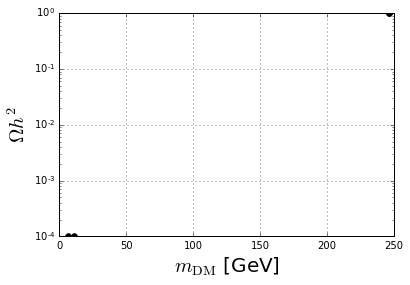

In [107]:
plt.semilogy(df.MS,df.LamhS,'ko')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()

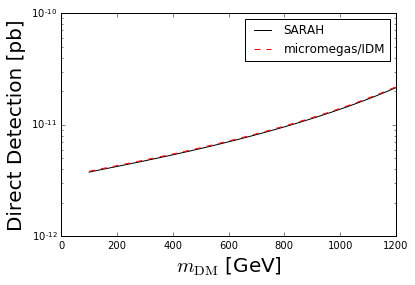

In [10]:
plt.semilogy(df.MS,df.neutron_SI,'k-')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)

[![Home](http://www.incredimail.com/images/nav%20bar/home-icon.png)](./) 
[Jupyter home](./draft.pdf)